In [82]:
# R Program session info
sessionInfo()

# Know your current working directory
getwd()

R version 4.0.2 (2020-06-22)
Platform: i386-w64-mingw32/i386 (32-bit)
Running under: Windows 10 x64 (build 19041)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_4.0.2  ellipsis_0.3.1  IRdisplay_0.7.0 pbdZMQ_0.3-3   
 [5] tools_4.0.2     htmltools_0.5.0 pillar_1.4.6    base64enc_0.1-3
 [9] crayon_1.3.4    uuid_0.1-4      IRkernel_1.1.1  jsonlite_1.7.0 
[13] digest_0.6.25   lifecycle_0.2.0 repr_1.1.0      rlang_0.4.7    
[17] evaluate_0.14  

[1] "C:/Users/ccoro/GIT/ProblemSets/2020-ps-MzCorona"

# Week 5, Precipitation in Boulder, CO in R Programming Language   


### LEARNING GOALS

After doing this exercise, you should be able to:

- Give examples of different kinds of precipitation and recall the two types that occur most often in the Boulder, CO area
- Identify which months receive the highest average precipitation, in Boulder, CO
- Modify R dataframes
- Create bar plots, in color! (oh my!)

### PREREQUISITES

- Know how to access a text/csv file in R


## BACKGROUND

> In the local weather news, every day we learn something new about what water vapor is up to in  the atmosphere -- we learn about rainfall, snowstorms, hail, drizzle, sleet, or if you live along the Front Range, all five in the same day. In meteorology and hydrology, these descriptions of water's condensation behavior from the atmosphere to the surface fit under the all-encompassing umbrella of precipitation (Pun absolutely intended).

> To know how much precipitation to expect on any given day, scientists use various types of gauges to measure precipitation amounts. Some of the simplest devices were invented hundreds of years ago-- literally small cylinders with vertical ticks that denote some unit of length. Below is an image of a modern rain gauge, with some visiting rain!

> Simple precipitation gauges are manually checked while fancier ones are automated.

![Rain_Gauge.jpg](Rain_Gauge.jpg)

### Precipitation in the Boulder, CO Area

- According to the National Oceanic and Atmospheric Administration (NOAA), the average annual precipitation (including rain, snow, etc) in Boulder, CO is ~ 20 inches. 

- The majority of precipitation falls in the __Winter__ (snow) or in the __Summer__ (rain).

#### Which months have the highest precipitation, on average?
Let's import some data to find out!

### But first, a review: What is a dataframe in R?

- In R, a __dataframe__ is a two-dimensional array-like structure that stores data. The data stored in a data frame can be numeric, factor or character type.

- In a __dataframe__, the columns contain the "variables" of the dataset. The rows contain the observations "obs". 

- A __dataframe__ differs from a matrix in that it can contain different data types, whereas a matrix can only contain one type of data.

> Let's import some data to see which months have the highest precipitation on average:

In [83]:
# Read a txt file locaed in the data folder, named "avg-mo-precip.txt"
avg_in_ppt <- read.delim("data/avg-monthly-precip-R.txt")

# Inspect the results. What do you see?
print(avg_in_ppt)

# Inspect the structure of this dataframe. What does it tell you?
str(avg_in_ppt)

   Avg_Precip_IN
1           0.70
2           0.75
3           1.85
4           2.93
5           3.05
6           2.02
7           1.93
8           1.62
9           1.84
10          1.31
11          1.39
12          0.84
'data.frame':	12 obs. of  1 variable:
 $ Avg_Precip_IN: num  0.7 0.75 1.85 2.93 3.05 2.02 1.93 1.62 1.84 1.31 ...


> Using `str()` we see that this dataframe has 1 column i.e. "variable" and 12 rows, i.e. "obs.".

> Let's add a column of months to the dataframe. We can use `cbind()`. 

In [84]:
#Adding a column with 12 "chr" values to identify the months
avg_mon_ppt = cbind(avg_in_ppt,Month=c(
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec" ))

#Inspecting the results
print(avg_mon_ppt)

#Inspecting the structure
str(avg_mon_ppt)


   Avg_Precip_IN Month
1           0.70   Jan
2           0.75   Feb
3           1.85   Mar
4           2.93   Apr
5           3.05   May
6           2.02   Jun
7           1.93   Jul
8           1.62   Aug
9           1.84   Sep
10          1.31   Oct
11          1.39   Nov
12          0.84   Dec
'data.frame':	12 obs. of  2 variables:
 $ Avg_Precip_IN: num  0.7 0.75 1.85 2.93 3.05 2.02 1.93 1.62 1.84 1.31 ...
 $ Month        : chr  "Jan" "Feb" "Mar" "Apr" ...



> __May and April seem to get the most rainfall.__

    
## Follow along with this example

### Scientists work in the metric system. Let's convert our values from inches to centimeters. 

> 1) There are 2.54 cm in 1 inch. Create a new dataframe that has the product of the values in the text file `avg_in_precip`, multiplied by 2.54.

In [85]:
avg_cm_ppt = (avg_in_ppt*2.54) # Multiplying the avg_in_ppt by 2.54
print(avg_cm_ppt)

   Avg_Precip_IN
1         1.7780
2         1.9050
3         4.6990
4         7.4422
5         7.7470
6         5.1308
7         4.9022
8         4.1148
9         4.6736
10        3.3274
11        3.5306
12        2.1336


__OOPS!__ The column name needs to be changed from "IN" to "CM". We'll use `colnames()`.

> `colnames()` defines the column (header) names of a matrix or dataframe.

> We are solely interested in renaming one column, we do this with __[ ] brackets.__

In [86]:
# colnames(ADD-DATAFRAME-HERE)[1]  <- "name" This would rename the first column.
colnames(avg_cm_ppt)[1]  <- "Avg_Precip_CM"
print(avg_cm_ppt)

   Avg_Precip_CM
1         1.7780
2         1.9050
3         4.6990
4         7.4422
5         7.7470
6         5.1308
7         4.9022
8         4.1148
9         4.6736
10        3.3274
11        3.5306
12        2.1336


__GREAT!__ Now we are going to add the __avg_cm_ppt__ dataframe to the __avg_mon_ppt__ dataframe using `cbind()`

> `cbind()` is short for "column bind" and can be used to combine two data frames (as long as they contain the same number of rows) into one single data frame.

In [87]:
avg_monthly = cbind(avg_mon_ppt,avg_cm_ppt) #Merging dataframes
print(avg_monthly) #Notice that the "cm" column is appended to the "in" dataframe.

   Avg_Precip_IN Month Avg_Precip_CM
1           0.70   Jan        1.7780
2           0.75   Feb        1.9050
3           1.85   Mar        4.6990
4           2.93   Apr        7.4422
5           3.05   May        7.7470
6           2.02   Jun        5.1308
7           1.93   Jul        4.9022
8           1.62   Aug        4.1148
9           1.84   Sep        4.6736
10          1.31   Oct        3.3274
11          1.39   Nov        3.5306
12          0.84   Dec        2.1336


### Now for some plotting!

We are going to use some R plotting tools to adjust the bar plot to what we want.

__For the margin size__
> `par()` adjusts plotting parameters.

> `par(mar=c())` adjusts margin size.
    
> `(mar=c(1,1,1,1))` is a numeric vector of length 4. It sets the margin size in the following manner: (bottom, left, top, right). 

> If you don't change this, you will get the default. Default is `mar=(c5.1,4.1,4.1,2.1)`

__For the axes__
> `las= ()` defines a numeric value indicating the orientation of the tick mark labels. 

> `las= ()` can be always parallel to the axis (default, 0), always horizontal (1), always perpendicular to the axis (2), and always vertical (3).


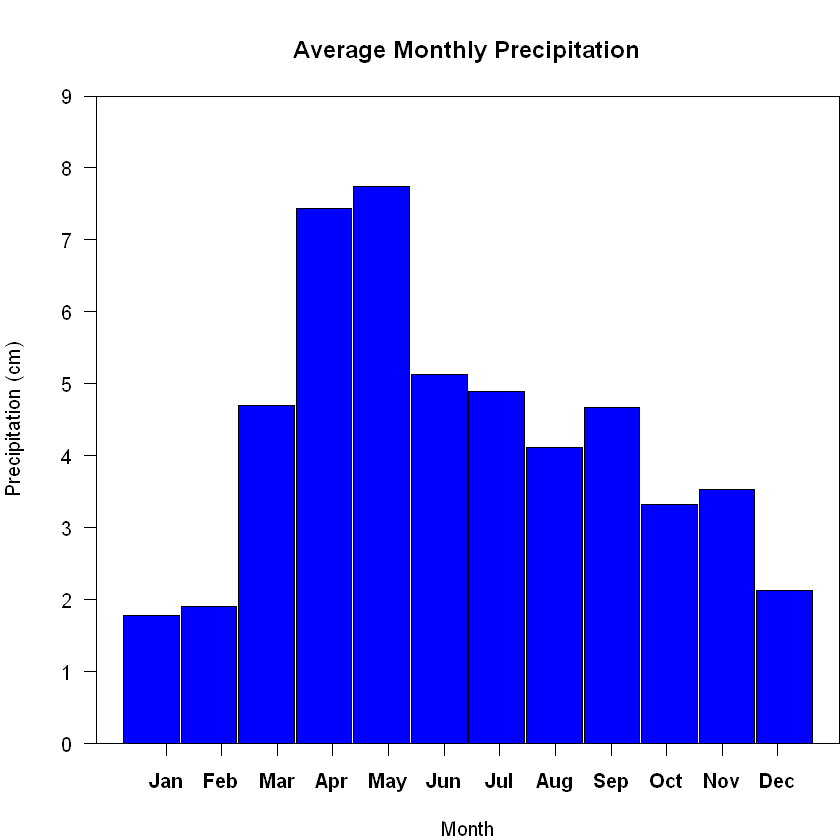

In [88]:
##################### Setting up the bar plot #############################

# Increase margin size
par(mar=c(4,4,4,0))

# The $ sign singles out the column you are interested in plotting (Avg_Precip_CM) within the dataframe (avg_monthly).
# ylim=c() is setting the y-axis value range
# We call axes = FALSE and ann = FALSE because we want to label these ourselves!
# The space=c() spaces out the columns.
# col="CHOOSE A COLOR"

barplot(avg_monthly$Avg_Precip_CM, ylim=c(0,9), axes = FALSE, 
        space=c(0.035,0.035,0.035,0.035), col="blue")

# Make x axis using month labels
axis(1, las=0, at=0.80:12.7,     
    lab=c("Jan", "Feb", "Mar", "Apr", 
           "May", "Jun", "Jul", "Aug", 
           "Sep", "Oct", "Nov", "Dec"), font.axis=2)

# Make y axis with horizontal labels that display ticks at every 1 marks. 
# 1*0:8 is equivalent to c(0,1,2,3,etc).
axis(2, las=2, at=1*0:9)

# Create a title with a black, bold font
title(main="Average Monthly Precipitation", col.main="black", font.main=2)

# Label the x and y axes
title(xlab="Month")
title(ylab="Precipitation (cm)")

# Create box around plot
box()

__Great!__

It turns out though, that the data we have been plotting only takes into account the climatology from __1971 - 2000__. A lot has happened since the year 2000, let's plot the climatology ranging from __1971 - 2019__. Then we can compare if any changes in the average have occurred in the last 19 years. Before we dive into that, let's review: 

# Brief Review, ANSWER KEY 

#### Use what you learned to answer the following questions:

__Q1)__ List five types of precipitation. Identify the two types of precipitation that are most common in the Boulder area.

__ANSWER__
> Snow, sleet, rain, hail, drizzle.
> Snow and rain are the most common in the Boulder, CO area

__Q2)__ According to the 1971 - 2000 climatology, which __three__ months receive the most precipitation?

__ANSWER__
> According to the climatology, April, May and June (June is just barely).


## Practing your Skills, ANSWER KEY

#### For these next questions, follow the instructions below:

- The csv file called `mo-precip-1971-2019-R.csv` contains a list of monthly averages per year (1971, 1972, etc), from 1971 - 2019. 
- Use `read.csv()` to import the csv file from the data folder.
- Use the `str()` to identify its structure.

__Q3)__ How many rows are there ("obs.")? Columns ("variables")? Number of years represented?


In [91]:
########## Q3 ANSWER CODE #############
# Read a csv file, named "avg-mo-precip.txt"
ppt1971to2019 <- read.csv("data/mo-precip-1971-2019-R.csv", 
                          header = TRUE, sep = ",")

# run the str() function on the data frame to see its structure, 
str(ppt1971to2019)

'data.frame':	49 obs. of  12 variables:
 $ Jan: num  0.51 1.15 1.09 0.9 0.45 0.42 0.08 1.02 0.59 0.99 ...
 $ Feb: num  1.36 0.44 0.17 1.07 0.88 0.34 0.45 0.33 0.06 0.8 ...
 $ Mar: num  0.78 0.68 1.74 1.22 1.23 1.19 0.53 1.06 2.57 1.18 ...
 $ Apr: num  6.01 1.52 4.42 3.07 2.85 1.99 3.32 3.77 2.21 2.17 ...
 $ May: num  2 1.22 4.88 0 4.33 2.14 0.93 8.03 6.67 2.48 ...
 $ Jun: num  0.41 3.66 0.48 2.08 2.01 1.25 0.66 1.65 3.02 0.32 ...
 $ Jul: num  1.37 2.24 1.14 0.51 1.67 1.62 4.75 1.55 1.69 1.5 ...
 $ Aug: num  0.1 1.79 0.32 0.37 1.31 1.43 1.48 1.57 1.77 0.92 ...
 $ Sep: num  4.21 1.18 2.31 2.13 1.06 2.73 0.15 0.57 0.57 1.18 ...
 $ Oct: num  0.72 1.26 0.69 2.24 0.68 1.02 0.4 2.46 1.35 0.6 ...
 $ Nov: num  0.56 2.15 1.84 1.06 1.2 0.21 0.61 0.2 2 1.14 ...
 $ Dec: num  0.66 1.14 1.13 0.46 0.57 0.32 0.13 1.61 1.7 0.17 ...


__Q3)__ __ANSWER__ 

> There are 49 rows and 12 columns. 

> 49 years are represented (1971 - 2019)

### Each column represents a month. 

> If we take the average of each column in the dataframe, the result will be the average rainfall per month, in inches, from 1971-2019.

In [92]:
########## SIMPLY RUN THIS CODE ##################
avg_in <- round(colMeans(ppt1971to2019[,c(1:12)]),2)
avg_in

Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec 
0.74 0.88 1.87 2.89 3.18 1.90 1.92 1.53 1.98 1.52 1.19 0.88

#### __Good!__
Now that we have calculated the average values for the climatology series, 1971 - 2019, let's get to work! 

__Q4)__ Convert the new climatology series from inches to centimeters and make it a new dataframe. Round to two decimal places (see example above). Use `print()` to check.

In [93]:
####### Q4 ANSWER CODE #############
avg_cm = round((avg_in*2.54), 2)
print(avg_cm)

 Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec 
1.88 2.24 4.75 7.34 8.08 4.83 4.88 3.89 5.03 3.86 3.02 2.24 


__5)__ Copy the "FOR PLOTTING" block of code from above into your code and update the x and y axes, labels and titles with the correct terms and units. *NOTE: We don't have to state the labels for the x-axis this time as they are incorporated in the table!

> Do the months of April, May and June still have the highest average precipitation? If not, what has changed?

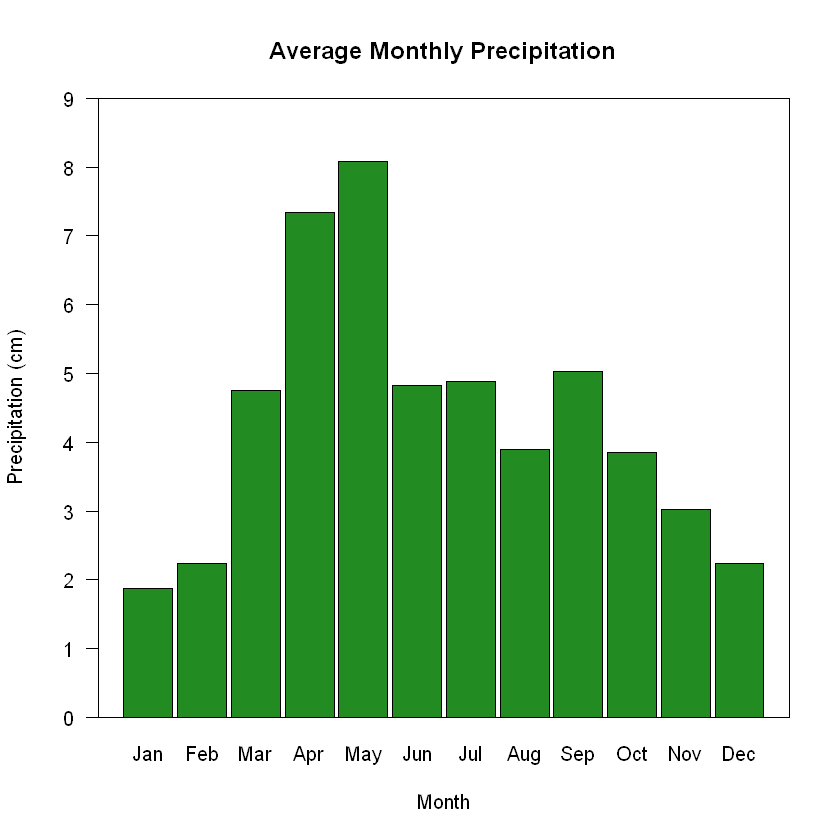

In [94]:
################# Q5 ANSWER CODE ####################
################# FOR PLOTTING ####################

barplot(avg_cm, ylim=c(0,9), axes = FALSE, ann = FALSE, 
        space=c(0.1,0.1,0.1,0.1), col="forestgreen")

# Make y axis with horizontal labels that display ticks at every 1 marks. 
# 1*0:10 is equivalent to c(0,1,2,3,4, etc).
axis(2, las=2, at=1*0:9)

# Create a title with a red, bold/italic font
title(main="Average Monthly Precipitation", col.main="black", font.main=2)

# Label the x and y axes
title(xlab="Month")
title(ylab="Precipitation (cm)")

# Create box around plot
box()

__5)__ __ANSWER__ 

> April and May still have the highest average precipitation. 

> September has surpassed June for 3rd highest monthly average precipitation.

### BONUS KNOWLEDGE (the best, really):

Let's do a plot v. plot comparison of the two climatologies. All you have to do here is run the code. 

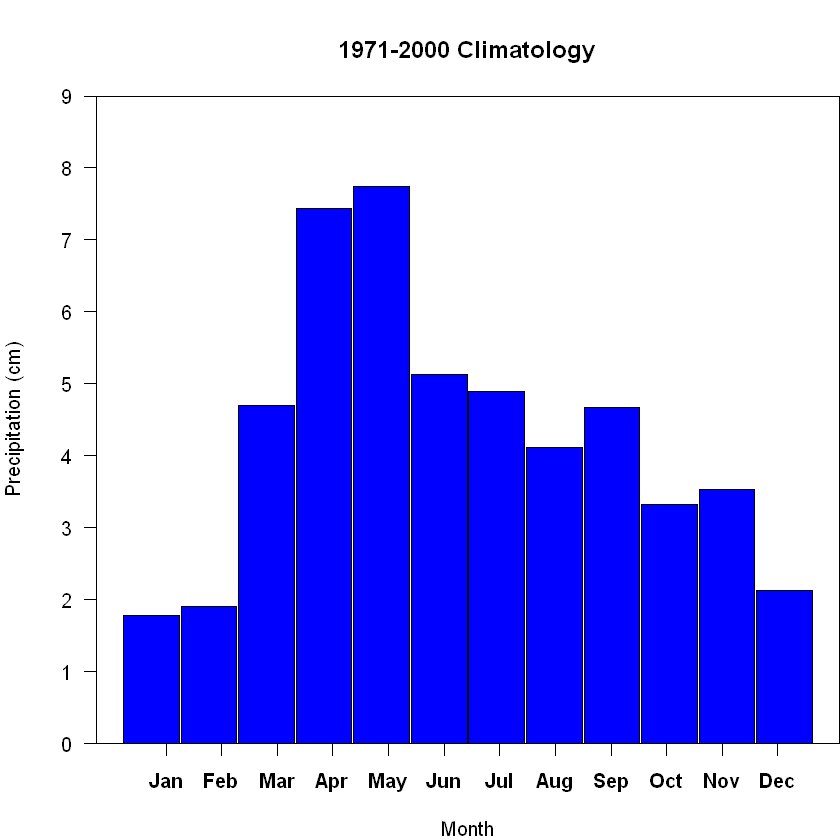

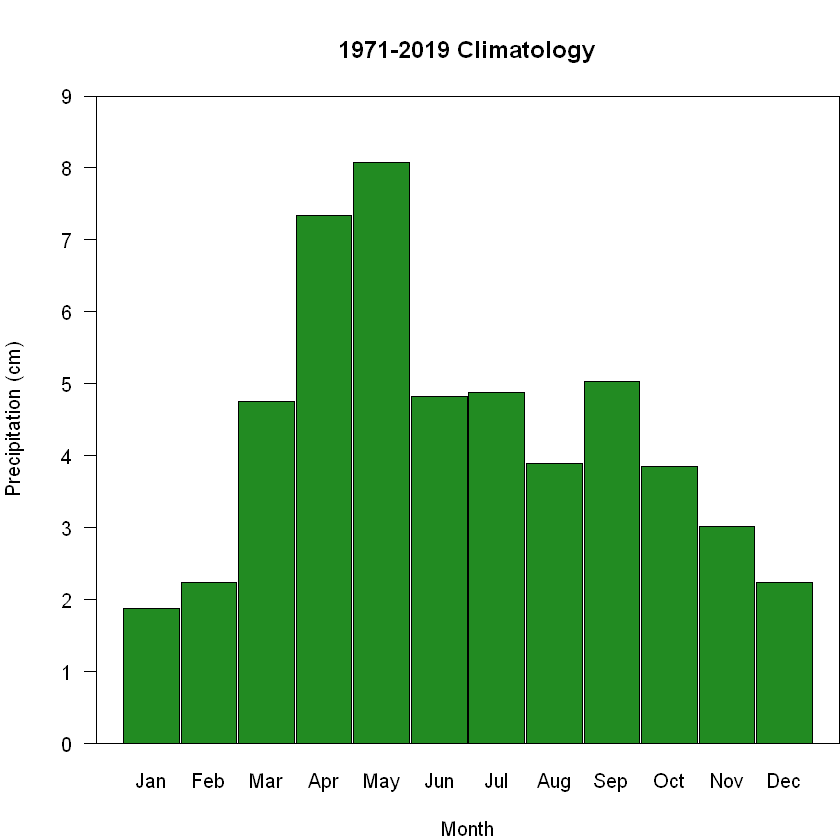

In [95]:
################# SIMPLY RUN THIS CODE ####################
# Increase margin size
par(mar=c(4,4,4,0))

barplot(avg_monthly$Avg_Precip_CM, 
        ylim=c(0,9), 
        axes = FALSE, 
        ann = FALSE, 
        space=c(0.035,0.035,0.035,0.035), 
        col="blue")

# Make x axis using month labels
axis(1, las=0, at=0.80:12.7,     
    lab=c("Jan", "Feb", "Mar", "Apr", 
           "May", "Jun", "Jul", "Aug", 
           "Sep", "Oct", "Nov", "Dec"), font.axis=2)

# Make y axis with horizontal labels that display ticks at every 1 marks. 
# 1*0:9 is equivalent to c(0,1,2,3,etc).
axis(2, las=2, at=1*0:9)

# Create a title with a red, bold/italic font
title(main="1971-2000 Climatology", col.main="black", font.main=2)

# Label the x and y axes 
title(xlab="Month")
title(ylab="Precipitation (cm)")

# Create box around plot
box()

##################################################

# Increase margin size
par(mar=c(4,4,4,0))

barplot(avg_cm, 
        ylim=c(0,9), 
        axes = FALSE, 
        ann = FALSE, 
        space=c(0.035,0.035,0.035,0.035),
        col="forestgreen")

# Make y axis with horizontal labels that display ticks at every 1 marks. 
# 1*0:10 is equivalent to c(0,1,2,3,4, etc).
axis(2, las=2, at=1*0:9)

# Create a title with a red, bold/italic font
title(main="1971-2019 Climatology", col.main="black", font.main=2)

# Label the x and y axes
title(xlab="Month")
title(ylab="Precipitation (cm)")

# Create box around plot
box()

#### Does anything seem different when comparing the two plots?

> The average precipitation from __Oct to Dec__ for both plots differs. In the __1971-2019__ plot, the precipitation seems to be __decreasing__ from October to December. That is certainly not the case in the 1971-2000 climatology.

> It seems then like the last 19 years have influenced the average monthly precipitation rates. 

> Are there any other changes you spot? What do you think these changes might mean for the local environment? Especially in the late Fall/early Winter months?

> The impacts that these changes have on our regional watersheds are certainly worth examining. But that'll be a lesson for another time. ^_^


## Congrats! You passed the lesson with falling colors! 

![High_Five_Husky.jpg](High_Five_Husky.jpg)

### References
__Rain_Gauge_Image__ 
Four Season Tools. (2020). Link: https://www.smallfarmtools.com/-367 Accessed: 09/07/20.

__Avg_Monthly_Precip_Data__ 
National Oceanic and Atmospheric Administration. Earth Systems Research Laboratories. (2020). Link: https://psl.noaa.gov/boulder/Boulder.mm.precip.html Accessed: 09/07/20.

__Adding Columns to R DataFrame__ 
DataMentor (2020). R Data Frame. Link: https://www.datamentor.io/r-programming/data-frame/ Accessed: 09/26/20.

__Graphs in R__ 
McCown, Frank. (2020). Producing Simple graphs with R. Link: https://sites.harding.edu/fmccown/r/ Accessed: 09/28/20

__Axis Labels in R__ 
DataMentor (2020). Advanced R barplot customization. Link:https://www.r-graph-gallery.com/210-custom-barplot-layout.html Accessed: 09/28/20.

__Multiple graphs in a Single Plot__ 
DataMentor (2020). R par() function. Link:https://www.datamentor.io/r-programming/subplot/ Accessed: 09/28/20.

__High_Five_Husky__ 
Best Life. (2020). Link: https://bestlifeonline.com/adorable-puppy-pictures Accessed: 09/08/20.